In [1]:
import warnings as wns
wns.filterwarnings('ignore')

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


word2Vec은 Word to Vector의 줄임말로 단어를 벡터로 변환시킨 값이라고 볼 수 있다.  
word2Vec의 장점은 의미가 비슷한 단어는 벡터 공간에서 서로 가까운 위치에 존재하게 되는 비지도 학습으로 말뭉치 데이터만 있으면 쉽게 word2Vec를 구현할 수 있다.

데이터 획득

In [3]:
corpus = ['king is a strong man', 
          'queen is a wise woman', 
          'boy is a young man', 
          'girl is a young woman',
          'prince is a young king', 
          'princess is a young queen', 
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king', 
          'princess is a girl will be queen']
corpus

['king is a strong man',
 'queen is a wise woman',
 'boy is a young man',
 'girl is a young woman',
 'prince is a young king',
 'princess is a young queen',
 'man is strong',
 'woman is pretty',
 'prince is a boy will be king',
 'princess is a girl will be queen']

불용어(stop words) 제거하기  
불용어란 학습에 도움이 되지도 않으면서 빈번하게 발생되는 단어를 의미하며 효율적인 학습을 위해 불용어를 데이터에서 제거한다.

In [4]:
# 불용어를 제거하는 함수를 만든다.
def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results = [] # 인수로 넘어온 문장에서 불용어를 제거한 결과를 저장시켜 리턴할 빈 리스트를 선언한다.
    # 불용어를 제거할 문장을 한줄씩 읽어가며 반복한다.
    for text in corpus:
        # print(text)
        # 불용어를 제거하기 위해서 공백을 경계로 문장을 단어 단위로 나눈다.
        temp = text.split(' ')
        # 불용어 개수만큼 반복하며 불용어를 제거할 문장에서 불용어를 제거한다.
        for stop_word in stop_words:
            # 문장에 불용어가 포함되어있으면 제거한다.
            while stop_word in temp:
                temp.remove(stop_word)
        # ===== for stop_word in stop_words
        # print(temp)
        # 불용어가 제거된 단어 사이에 join() 메소드로 공백을 넣어서 불요어가 제거된 문장으로 만든다.
        results.append(' '.join(temp))
    return results

corpus = remove_stop_words(corpus)
corpus

['king strong man',
 'queen wise woman',
 'boy young man',
 'girl young woman',
 'prince young king',
 'princess young queen',
 'man strong',
 'woman pretty',
 'prince boy king',
 'princess girl queen']

불용어를 제거한 후 데이터에 존재하는 단어들은 다음과 같다.

In [5]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)
print(words) # 중복되는 단어가 존재한다.
print('=' * 80)

# 불용어를 제거한 단어의 중복을 제거한다.
words = set(words)
print(words) # 중복되는 단어가 존재하지 않는다.

['king', 'strong', 'man', 'queen', 'wise', 'woman', 'boy', 'young', 'man', 'girl', 'young', 'woman', 'prince', 'young', 'king', 'princess', 'young', 'queen', 'man', 'strong', 'woman', 'pretty', 'prince', 'boy', 'king', 'princess', 'girl', 'queen']
{'young', 'strong', 'girl', 'princess', 'boy', 'man', 'wise', 'pretty', 'woman', 'king', 'prince', 'queen'}


단어별 매핑 테이블 만들기  
단어를 원 핫 인코딩으로 변환하기 위해서 가장 먼저 인덱스로 인코딩을 해야하고 단어를 손쉽게 인덱싱하기 위해 key는 단어이고 value는 인덱스인 딕셔너리를 만든다.

In [6]:
word2int = {}
for index, key in enumerate(words):
    print(index, key)
    word2int[key] = index
print('=' * 80)
print(word2int)

0 young
1 strong
2 girl
3 princess
4 boy
5 man
6 wise
7 pretty
8 woman
9 king
10 prince
11 queen
{'young': 0, 'strong': 1, 'girl': 2, 'princess': 3, 'boy': 4, 'man': 5, 'wise': 6, 'pretty': 7, 'woman': 8, 'king': 9, 'prince': 10, 'queen': 11}


레이블 생성  
skip gram 방식으로 각 단어별 레이블을 생성한다.

In [7]:
sentences = []
for sentence in corpus:
    sentences.append(sentence.split(' '))
print(sentences)

[['king', 'strong', 'man'], ['queen', 'wise', 'woman'], ['boy', 'young', 'man'], ['girl', 'young', 'woman'], ['prince', 'young', 'king'], ['princess', 'young', 'queen'], ['man', 'strong'], ['woman', 'pretty'], ['prince', 'boy', 'king'], ['princess', 'girl', 'queen']]


In [8]:
WINDOW_SIZE = 2
data = []
# 단어별 레이블을 생성할 문장의 개수만큼 반복하며 단어별 레이블을 생성한다.
for sentence in sentences:
    # print('sentence: {}'.format(sentence))
    for index, word in enumerate(sentence):
        # print('index: {}, word: {}'.format(index, word))
        
        for neighbor in sentence[max(index - WINDOW_SIZE, 0):min(index + WINDOW_SIZE, len(sentence)) + 1]:
            # print('neighbor: {}'.format(neighbor))
            if neighbor != word:
                data.append([word, neighbor])
                print(word, neighbor)
            # ===== if neighbor != word
        # ===== for neighbor
    # ===== for index, word
    print('=' * 80)
# ===== for sentence

king strong
king man
strong king
strong man
man king
man strong
queen wise
queen woman
wise queen
wise woman
woman queen
woman wise
boy young
boy man
young boy
young man
man boy
man young
girl young
girl woman
young girl
young woman
woman girl
woman young
prince young
prince king
young prince
young king
king prince
king young
princess young
princess queen
young princess
young queen
queen princess
queen young
man strong
strong man
woman pretty
pretty woman
prince boy
prince king
boy prince
boy king
king prince
king boy
princess girl
princess queen
girl princess
girl queen
queen princess
queen girl


In [9]:
df = pd.DataFrame(data, columns=['input', 'label'])
df.head(10)

,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king
5,man,strong
6,queen,wise
7,queen,woman
8,wise,queen
9,wise,woman


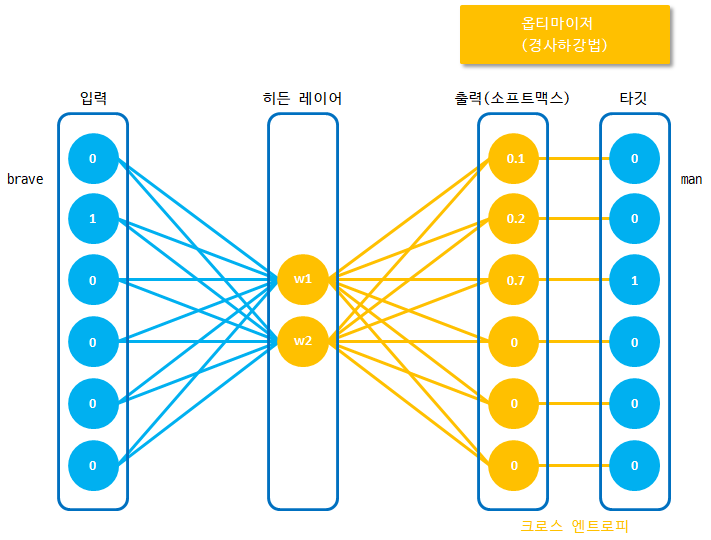

In [10]:
from IPython.display import Image
Image('./image/word2vec.png', width='700')

In [11]:
ONE_HOT_DIM = len(words)

# 숫자를 원 핫 인코딩으로 전환하는 함수를 만든다.
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

# results = to_one_hot_encoding(0)
# results

X = [] # 입력 단어
Y = [] # 레이블

# 데이터프레임에 저장된 입력과 입력에 따른 결과를 원 핫 인코딩으로 변환해서 X, Y 리스트에 저장한다.
for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[x]))
    Y.append(to_one_hot_encoding(word2int[y]))
# print(X[0], Y[0])

# 딥러닝 모델 입력값으로 전환한다.
# np.array()는 ndarray(배열)을 만드는데 np.asarray()는 이미 ndarray의 데이터 형태가 설정되어 있다면 데이터 형태가 다를 
# 경우에만 복사가 된다.
X_train = np.asarray(X)
Y_train = np.asarray(Y)
# print(X_train[0], Y_train[0])

# 입력값 및 레이블을 받기 위한 placeholder를 설정한다.
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# 시각화를 위해 임베딩을 2차원으로 설정한다.
EMBEDDING_DIM = 2

# 히든 레이어
# tf.truncated_normal()는 꼬리를 잘라낸 정규 분포를 따르는 난수를 얻어온다.
W1 = tf.Variable(tf.truncated_normal([ONE_HOT_DIM, EMBEDDING_DIM], stddev=0.1))
hidden_layer = tf.matmul(x, W1)

# 출력 레이어
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add(tf.matmul(hidden_layer, W2), b2))

# 손실 함수: 크로스 엔트로피
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=1))

# 최적화
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

학습시킨다.

In [12]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

iteration = 20000
for i in range(iteration + 1):
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 2000 == 0:
        print('iteration: {0:5d}. loss: {1:7.5f}'.format(i, sess.run(loss, feed_dict={x: X_train, y_label: Y_train})))

iteration:     0. loss: 2.46837
iteration:  2000. loss: 2.18535
iteration:  4000. loss: 2.03030
iteration:  6000. loss: 1.92479
iteration:  8000. loss: 1.87584
iteration: 10000. loss: 1.85312
iteration: 12000. loss: 1.83860
iteration: 14000. loss: 1.82801
iteration: 16000. loss: 1.81970
iteration: 18000. loss: 1.81292
iteration: 20000. loss: 1.80724


히든 레이어의 값(word2Vec) 추출하기

In [13]:
vectors = sess.run(W1)
print(vectors)

[[-0.09715433 -0.17796329]
 [ 1.0943869  -2.7189415 ]
 [-0.3867351   0.1906947 ]
 [-0.40322655 -0.9721145 ]
 [ 1.2049232  -1.0929189 ]
 [ 2.3029745   0.9507624 ]
 [-2.2173321  -0.158806  ]
 [-1.9202901   1.0080615 ]
 [-0.26241866 -0.32952747]
 [ 1.0090288  -0.00492052]
 [ 2.8692734  -0.33430865]
 [-0.20972249  0.6249991 ]]


word2Vec의 좌표값을 데이터프레임으로 저장한다.

In [14]:
w2v_df = pd.DataFrame(vectors, columns=['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,young,-0.097154,-0.177963
1,strong,1.094387,-2.718941
2,girl,-0.386735,0.190695
3,princess,-0.403227,-0.972115
4,boy,1.204923,-1.092919
5,man,2.302974,0.950762
6,wise,-2.217332,-0.158806
7,pretty,-1.920290,1.008062
8,woman,-0.262419,-0.329527
9,king,1.009029,-0.004921


word2Vec를 2차원 공간에 시각화한다.

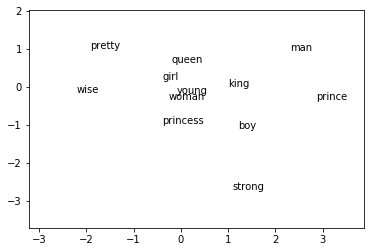

In [15]:
fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1, x2))

PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING

plt.xlim(x_axis_min, x_axis_max)
plt.ylim(y_axis_min, y_axis_max)
plt.rcParams['figure.figsize'] = [12, 10]
plt.show()